In [0]:
# Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import pandas_profiling

# Import Collections
from sklearn import metrics
from sklearn import tree
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
import graphviz

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [0]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')


In [4]:
data.info()
data.head()
data.columns
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

(4898, 12)

In [5]:
# STEP 1 - CREATE FEATURES AND LABEL
y=data.quality
x=data.drop('quality',axis=1)
y.head(1)
x.head(1)

0    6
Name: quality, dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [6]:
# STEP 2 - SPLIT TRAIN AND TEST DATA
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(3673, 11)

(3673,)

(1225, 11)

(1225,)

In [0]:
data.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [8]:
data.groupby('quality').size()


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

In [0]:
bins = (2,5,6,9)
names = [1,2,3]
data['quality_type'] = pd.cut(data['quality'], bins, labels = names)

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


In [11]:
data.groupby('quality_type'). size()


quality_type
1    1640
2    2198
3    1060
dtype: int64

In [0]:
data['quality_type'] = pd.to_numeric(data['quality_type'])


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null int64
dtypes: float64(11), int64(2)
memory usage: 497.5 KB


In [14]:
pwd()


'/content'

In [0]:
eda_report = pandas_profiling.ProfileReport(data)
eda_report.to_file('white_wine.html')

In [0]:
x = data.drop(['quality','quality_type'],axis = 1, inplace=False) #store pixel values in X
y = data['quality_type']

In [17]:
x.shape


(4898, 11)

In [18]:
x.columns


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [0]:
n_estimators = [10,500,1000,2000]
criterion = ['gini', 'entropy']
min_samples_split = [2, 10, 20, 50, 100]
max_depth = [20, 30, 40, 50, None]

In [21]:
# Importing the packages for Decision Tree Classifier
from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(max_depth=4)
my_tree_one

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# Fit the Decision Tree model on your features and Label

my_tree_one = my_tree_one.fit(x_train, y_train)

In [0]:
predicted = my_tree_one.predict(x_test)


In [24]:
metrics.accuracy_score(predicted, y_test)


0.556734693877551

In [25]:
print(metrics.classification_report(predicted, y_test))


              precision    recall  f1-score   support

           1       0.57      0.62      0.59       366
           2       0.62      0.52      0.57       643
           3       0.42      0.56      0.48       216

    accuracy                           0.56      1225
   macro avg       0.54      0.57      0.55      1225
weighted avg       0.57      0.56      0.56      1225



<Figure size 800x400 with 0 Axes>

Confusion Matrix


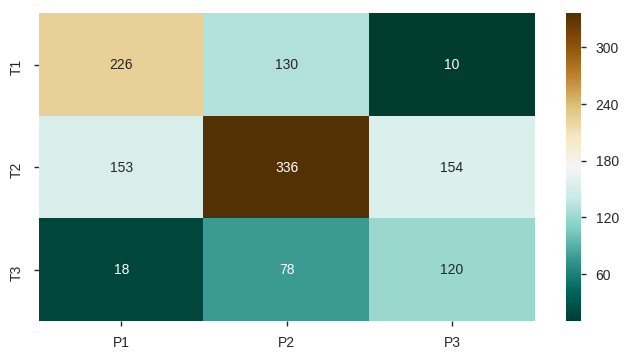

In [43]:
plt.figure(figsize=(8,4))
print('Confusion Matrix')
cf = metrics.confusion_matrix(predicted, y_test)
lbl1=["P1", "P2", "P3"]
lbl2 = ["T1", "T2", "T3"]
sns.heatmap(cf,annot=True,cmap ="BrBG_r", fmt="d", xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [27]:
my_tree_one.feature_importances_
x.columns
features = pd.DataFrame(my_tree_one.feature_importances_,x.columns)
features
features.columns = ["Importance"]
features

array([0.        , 0.2548307 , 0.01236851, 0.        , 0.00742463,
       0.13547932, 0.        , 0.        , 0.02408205, 0.0112559 ,
       0.5545589 ])

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

,0
fixed_acidity,0.000000
volatile_acidity,0.254831
citric_acid,0.012369
residual_sugar,0.000000
chlorides,0.007425
free_sulfur_dioxide,0.135479
total_sulfur_dioxide,0.000000
density,0.000000
pH,0.024082
sulphates,0.011256


,Importance
fixed_acidity,0.000000
volatile_acidity,0.254831
citric_acid,0.012369
residual_sugar,0.000000
chlorides,0.007425
free_sulfur_dioxide,0.135479
total_sulfur_dioxide,0.000000
density,0.000000
pH,0.024082
sulphates,0.011256


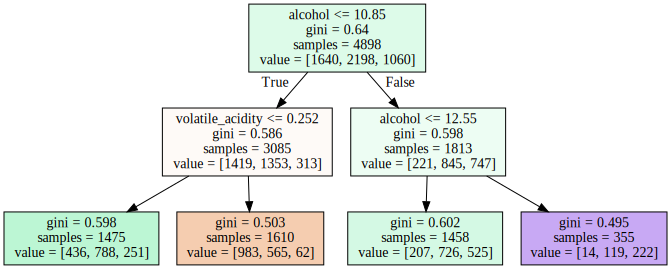

In [28]:
import graphviz
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x,y)
with open('tree.dot','w') as dotfile:
    tree.export_graphviz(clf,out_file=dotfile,feature_names=x.columns,filled=True)
    dotfile.close()
    
from graphviz import Source
with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot

In [0]:
#Decision Tree Hyperparameters optimization using cross-validation 
criterion=['gini','entropy']
min_Sample_split=[2,10,20,50,100]
MAX_dEPTH=[20,30,40,None]

In [34]:
param_grid={'criterion':criterion, 'min_samples_split':min_samples_split,'max_depth':max_depth}
dt_g=GridSearchCV(my_tree_one, param_grid, cv=5,verbose = 2,n_jobs=-1)
dt_g.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    6.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40, 50, None],
                    

In [35]:
dt_g.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
dt_g.best_score_

0.6234685543152736

In [37]:
dt_g.best_index_

20

In [39]:
cv=pd.DataFrame(dt_g.cv_results_)
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028286,0.001359,0.001526,0.000262,gini,20,2,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.616848,0.627211,0.605442,0.611717,0.626194,0.617479,0.008356,9
1,0.026170,0.000430,0.001268,0.000035,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.599185,0.614966,0.620408,0.577657,0.612551,0.604955,0.015328,11
2,0.024178,0.001537,0.001252,0.000074,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.597826,0.580952,0.600000,0.542234,0.583902,0.580996,0.020760,27
3,0.020926,0.001249,0.001293,0.000164,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.576087,0.568707,0.583673,0.524523,0.568895,0.564389,0.020669,36
4,0.017943,0.001311,0.001226,0.000065,gini,20,100,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.544837,0.557823,0.602721,0.554496,0.541610,0.560305,0.022038,44
5,0.027677,0.000579,0.001358,0.000108,gini,30,2,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.615489,0.646259,0.609524,0.598093,0.619372,0.617751,0.015967,8
6,0.025759,0.001141,0.001620,0.000911,gini,30,10,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.591033,0.623129,0.624490,0.574932,0.605730,0.603866,0.018983,12
7,0.024259,0.001187,0.001191,0.000070,gini,30,20,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.596467,0.582313,0.601361,0.543597,0.581173,0.580996,0.020269,27
8,0.021499,0.000695,0.001239,0.000148,gini,30,50,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.573370,0.567347,0.583673,0.524523,0.568895,0.563572,0.020330,40
9,0.024015,0.007305,0.001342,0.000304,gini,30,100,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.544837,0.557823,0.602721,0.554496,0.541610,0.560305,0.022038,44


In [41]:
cv.to_CSV("Whitewine.CSV")

AttributeError: ignored

In [45]:
predicted=dt_g.predict(x_test)
metrics.accoracy_score(predicted,y_test)
print(metrics.classification_report(predicted,y_test))
#confusion matrix
plt.figure(figsize=(8,4))
print("confusion Matrix")
cf=metrics.confusion_matrix(predicted,y_test)
lbl1=["P1","P2","P3"]
lbl2=["T1","T2","T3"]
sns.heatmap(cf.annot=True,cmap="Blues",fmt="d",xticktables=lbl1,yticktables=lbl2)
plt.show()

SyntaxError: ignored